# Student Performance Indicator


Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.
2.1 Import Data and Required Packages

In [2]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec as gs

In [3]:
# importing dataset
df_students = pd.read_csv("C:\\Users\\hp\\python_pipenv\\Machine learning\\mlproject\\notebooks\\stud.csv")

In [4]:
df_students.sample(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
147,male,group C,associate's degree,free/reduced,none,73,68,66
878,female,group D,some high school,standard,none,59,72,80


# Checking for Missing and Duplicate values

In [5]:
# checking for misssing and duplicate data
print('The Data has \n {} missing values \n and  {} duplicate values'.format(df_students.isna().sum(), df_students.duplicated().sum()))

The Data has 
 gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64 missing values 
 and  0 duplicate values


In [6]:
# checking for data type 
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# checking for unique values
df_students.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

# checking Data Statistics

In [8]:
df_students.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Exploratory Analysis

In [9]:
_a = [df_students.dtypes[i] == 'object' for i in df_students.columns if df_students[i].dtype != 'o']
_a

[True, True, True, True, True, False, False, False]

# Adding the Total Average and Total Score 

In [10]:
for i in df_students.columns:
    i.replace("_",'')

In [11]:
df_students['total_score']= df_students['math_score'] + df_students['reading_score'] + df_students['writing_score']
df_students['average'] = df_students['total_score']/3
df_students

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [12]:
# Score 100% in work
# counting students with perfect score in each subject
math_perfect =  df_students[df_students['math_score'] == 100]['math_score'].count()
reading_perfect = df_students[df_students['reading_score'] == 100]['reading_score'].count()
writing_perfect = df_students[df_students['writing_score'] == 100]['writing_score'].count()

print(f'The number of students with perfect score in mathematics is: {math_perfect}')
print(f'The number of students with perfect score in reading is: {reading_perfect}')
print(f'The number of students with perfect score in writing is: {writing_perfect}')




The number of students with perfect score in mathematics is: 7
The number of students with perfect score in reading is: 17
The number of students with perfect score in writing is: 14


In [13]:
# Calating the lower percentile for the data
math_perfect =  df_students[df_students['math_score'] <= 20]['math_score'].count()
reading_perfect = df_students[df_students['reading_score'] <= 20]['reading_score'].count()
writing_perfect = df_students[df_students['writing_score'] <= 20]['writing_score'].count()

print(f'The number of students with perfect score in mathematics is: {math_perfect}')
print(f'The number of students with perfect score in reading is: {reading_perfect}')
print(f'The number of students with perfect score in writing is: {writing_perfect}')




The number of students with perfect score in mathematics is: 4
The number of students with perfect score in reading is: 1
The number of students with perfect score in writing is: 3


# Insights
- Studnents perform worse in mathematics  
-  Students perform best in reading 


## Univariate Analysis

In [14]:
df_students.sample(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
741,female,group A,associate's degree,free/reduced,none,37,57,56,150,50.000000
705,male,group A,bachelor's degree,free/reduced,none,62,72,65,199,66.333333


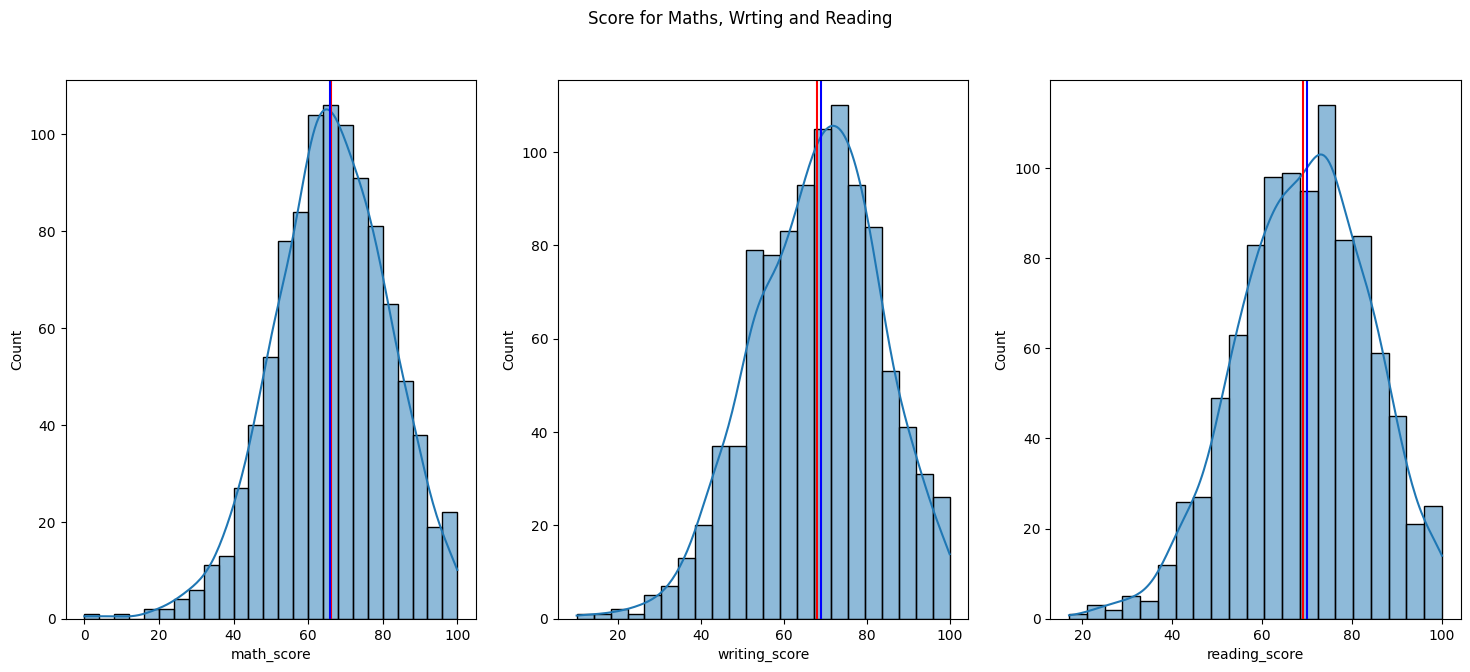

In [15]:
fig, ax = plt.subplots(nrows=1,ncols=3, figsize = [18,7])
sns.histplot(data = df_students, x = 'math_score', kde = True, ax = ax[0])
sns.histplot(data = df_students, x = 'writing_score', kde = True, ax = ax[1])
sns.histplot(data = df_students, x = 'reading_score', kde = True, ax = ax[2])
sujects  = ['math_score','writing_score','reading_score']
for i,v in zip(range(3),sujects):
    ax[i].axvline(df_students[v].mean(), color = 'red')
    ax[i].axvline(df_students[v].median(), color = 'blue')

plt.suptitle('Score for Maths, Wrting and Reading');



,average,total_score
count,1000.000000,1000.000000
mean,67.770667,203.312000
std,14.257326,42.771978
min,9.000000,27.000000
25%,58.333333,175.000000
50%,68.333333,205.000000
75%,77.666667,233.000000
max,100.000000,300.000000


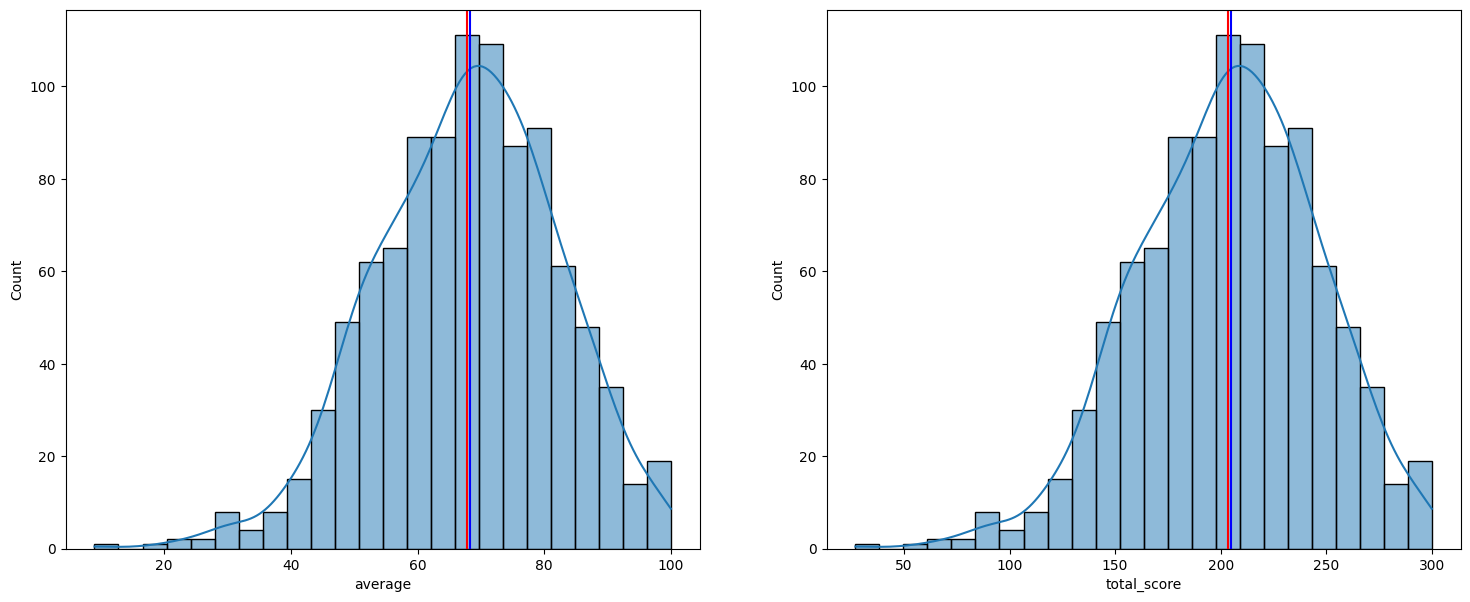

In [16]:
# Averge score  nd total score
fig, ax = plt.subplots(nrows=1,ncols=2, figsize = [18,7])
sns.histplot(data = df_students, x = 'average', kde = True, ax = ax[0])
sns.histplot(data = df_students, x = 'total_score', kde = True,ax = ax[1])
sujects  = ['average','total_score']

for i,v in zip(range(2),sujects):
    ax[i].axvline(df_students[v].mean(), color = 'red')
    ax[i].axvline(df_students[v].median(), color = 'blue')

df_students[['average','total_score']].describe()

#  Bivarate Analysis

In [17]:
#grouping by gender
_grp = df_students.groupby('gender')
_grp[['average','total_score']].mean()
_grp.agg(['mean','median','min','max']).T



C:\Users\hp\AppData\Local\Temp\ipykernel_12268\1029423950.py:4: FutureWarning: ['race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  _grp.agg(['mean','median','min','max']).T


gender                    female        male
math_score    mean     63.633205   68.728216
              median   65.000000   69.000000
              min       0.000000   27.000000
              max     100.000000  100.000000
reading_score mean     72.608108   65.473029
              median   73.000000   66.000000
              min      17.000000   23.000000
              max     100.000000  100.000000
writing_score mean     72.467181   63.311203
              median   74.000000   64.000000
              min      10.000000   15.000000
              max     100.000000  100.000000
total_score   mean    208.708494  197.512448
              median  211.000000  199.000000
              min      27.000000   69.000000
              max     300.000000  300.000000
average       mean     69.569498   65.837483
              median   70.333333   66.333333
              min       9.000000   23.000000
              max     100.000000  100.000000

,average,total_score
gender,,
female,69.569498,208.708494
male,65.837483,197.512448


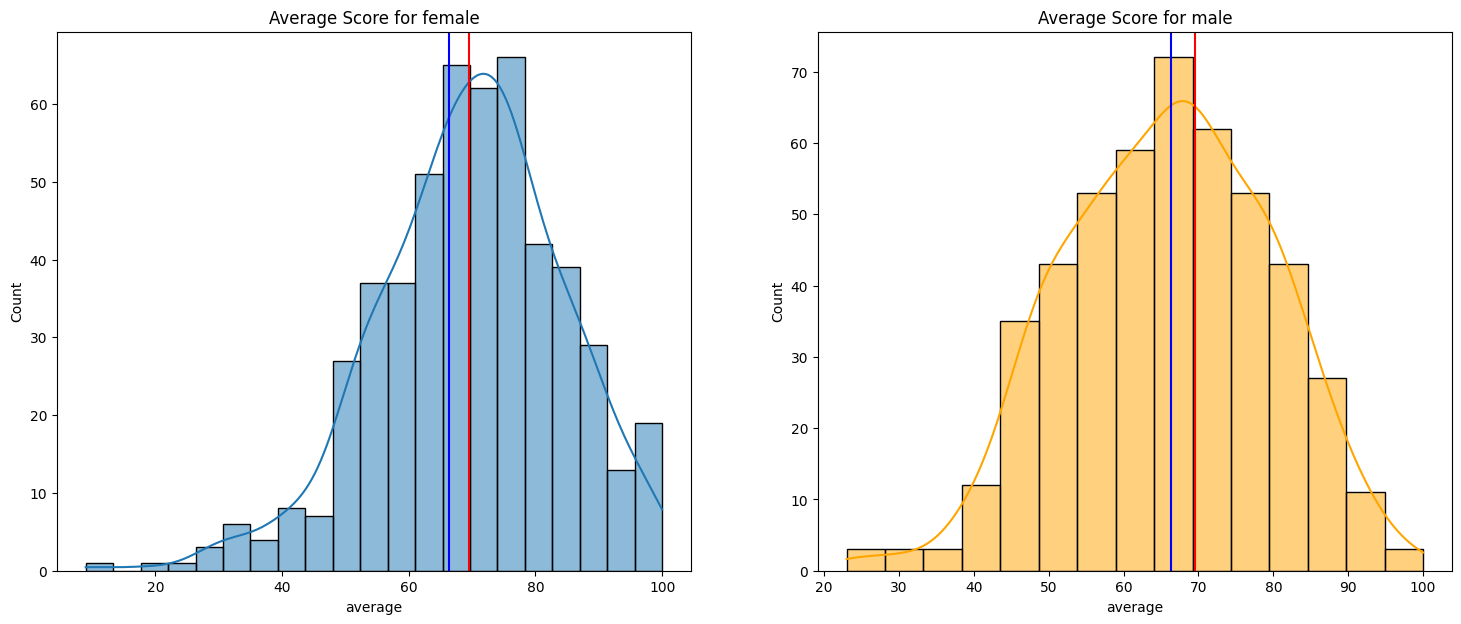

In [18]:
df_male = df_students.query('gender == "male"')
df_female = df_students.query('gender == "female"')

fig, ax = plt.subplots(nrows=1,ncols=2, figsize = [18,7])
sns.histplot(data = df_female, x = 'average', kde = True, ax = ax[0])
sns.histplot(data = df_male, x = 'average', kde = True,ax = ax[1], color= 'orange')
sujects  = ['average','average']
ax[0].set_title('Average Score for female')
ax[1].set_title('Average Score for male')

for i,v in zip(range(2),sujects):
    ax[i].axvline(df_female[v].mean(), color = 'red')
    #ax[i].text(50,df_female[v].mean(), str(df_female[v].mean()))
    ax[i].axvline(df_male[v].median(), color = 'blue')
# _combine = pd.DataFrame()
# _combine.append
_grp[['average','total_score']].mean()
#df_female.describe()



The male students have a lower average score than the female, 
- The female show a minimum average and total Score with female students showing 2 peaks

- The count for male students are higher than female students

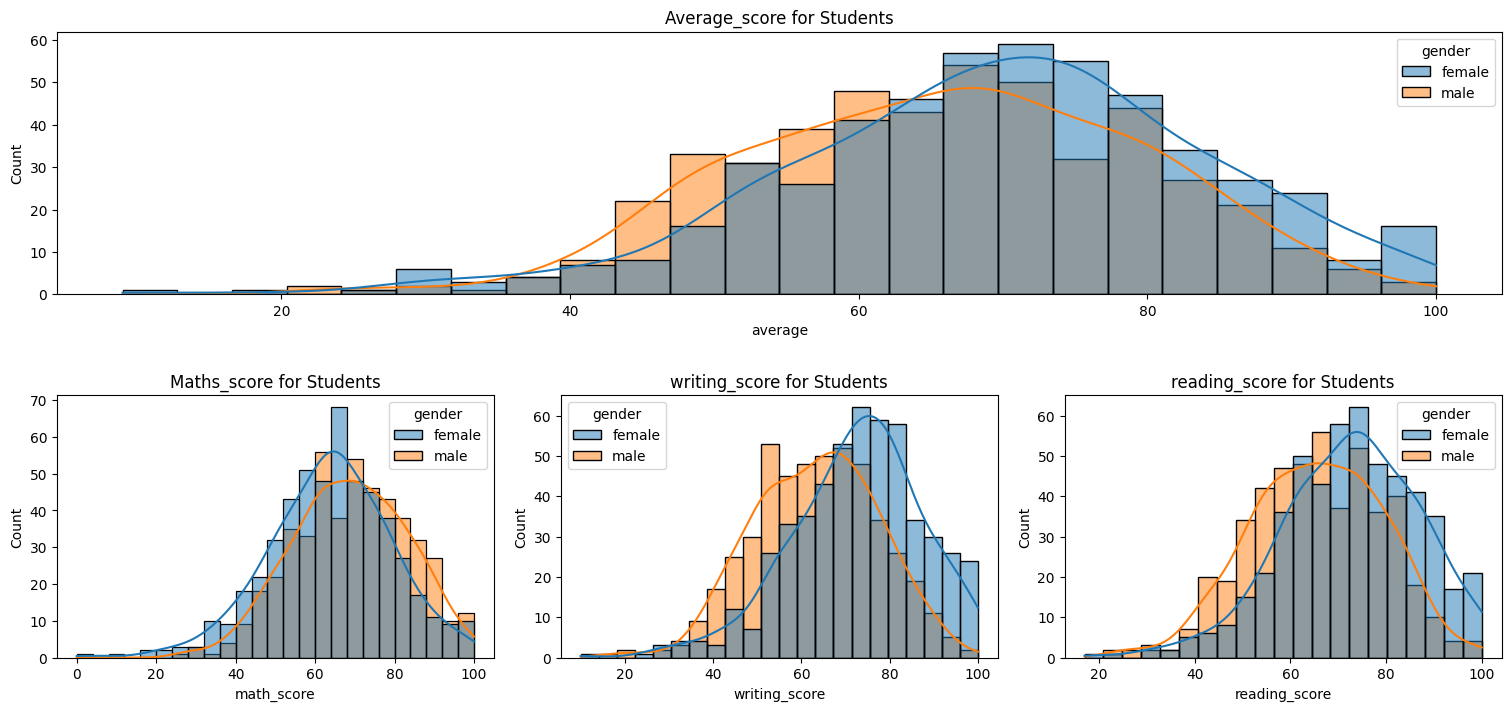

In [19]:
fig1 = plt.figure(constrained_layout = True, figsize=[15,7])
gs =fig1.add_gridspec(2,3,hspace = 0.1)
ax1 = fig1.add_subplot(gs[0,:])
ax1.set_title('Average_score for Students')
ax2 = fig1.add_subplot(gs[1,0])
ax2.set_title('Maths_score for Students')

ax3 = fig1.add_subplot(gs[1,1])
ax3.set_title('writing_score for Students')

ax4 = fig1.add_subplot(gs[1,2])
ax4.set_title('reading_score for Students')

grd,score = [ax1,ax2,ax3,ax4],['average','math_score','writing_score','reading_score']


for i,j in zip(grd,score):
    sns.histplot(data = df_students, x = j, hue = 'gender',kde =True, ax = i)



### Observation

- Female students perform better than male above the 40th percentile
- Male students show a lower minimum average across all three subjects [Writing, Reading, Math]
- The percentage of female students with perfect score is significantly greater than the male in wrting and reading
- male students performace seems more dominant in mathematics


In [20]:
df_students

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [21]:
df_students['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

<Axes: xlabel='lunch', ylabel='count'>

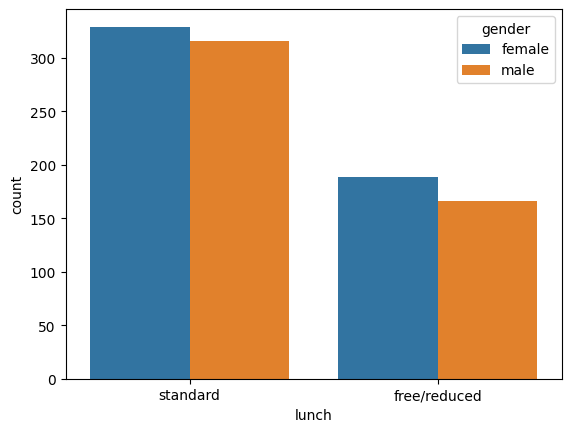

In [22]:
# lunch and Gender
sns.countplot(data= df_students, x= 'lunch', hue = 'gender')

### Observation
- A higher percetage of male and female studnets take the standard lunch

,index,race_ethnicity
4,group A,89
2,group B,190
0,group C,319
1,group D,262
3,group E,140


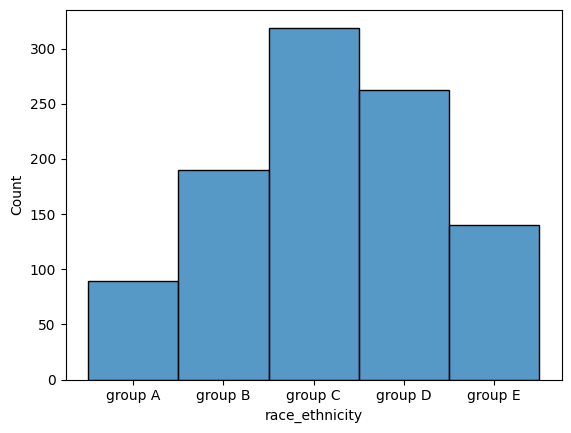

In [23]:
# Race , ethnicty and gender
sns.histplot(data = df_students.sort_values('race_ethnicity'), x = 'race_ethnicity')
pd.DataFrame(df_students['race_ethnicity'].value_counts()).reset_index().sort_values('index')

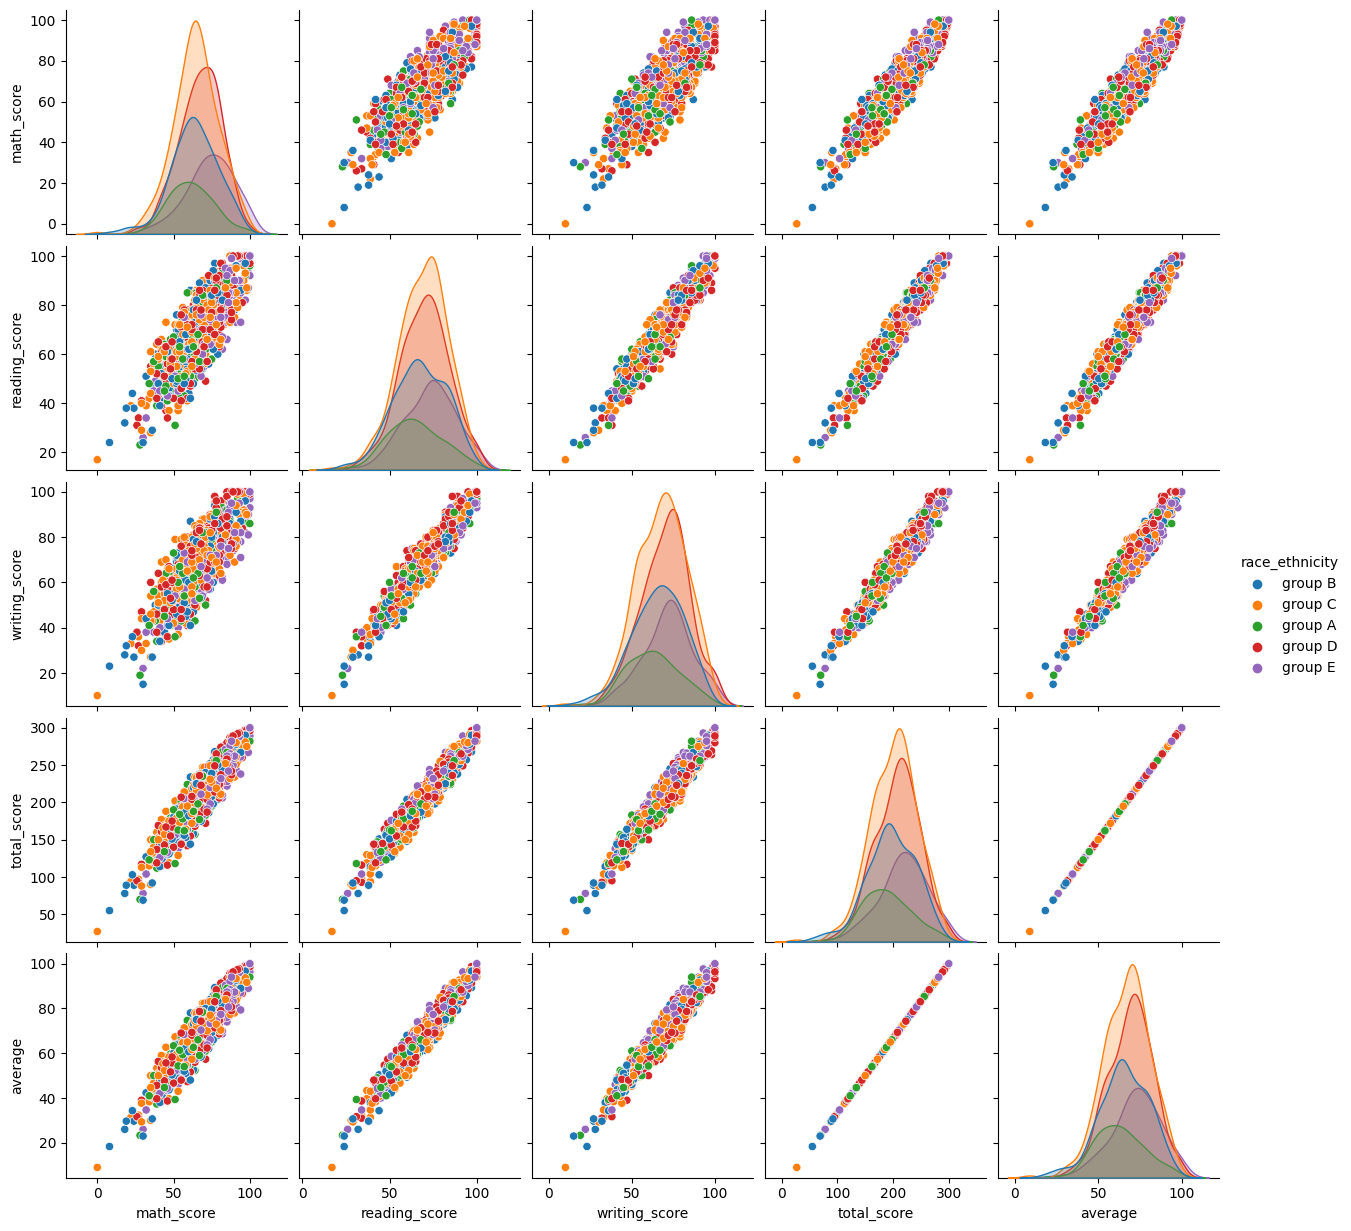

In [24]:
sns.pairplot(data= df_students, hue  ='race_ethnicity')

<Axes: xlabel='average', ylabel='Count'>

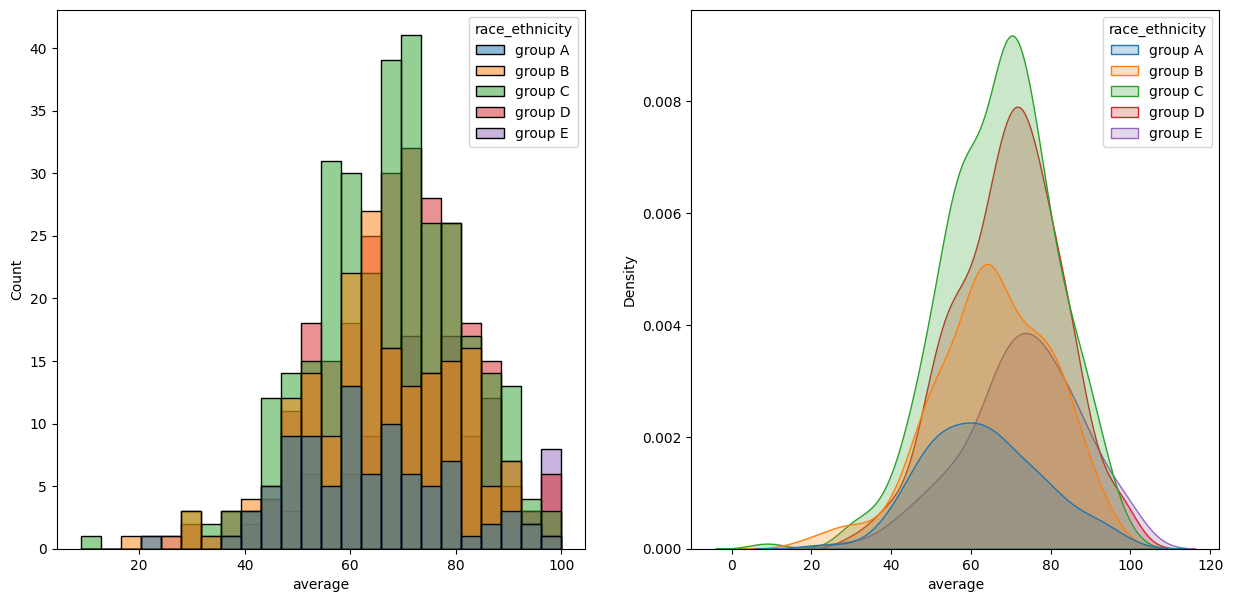

In [43]:
fig , ax = plt.subplots(nrows=1, ncols=2, figsize = [15,7])
sns.kdeplot(data= df_students.sort_values('race_ethnicity'), x = 'average', hue= 'race_ethnicity',fill = True, ax = ax[1])
sns.histplot(data= df_students.sort_values('race_ethnicity'), x = 'average', hue= 'race_ethnicity',ax = ax[0])

""
race_ethnicity
group A
group B
group C
group D
group E


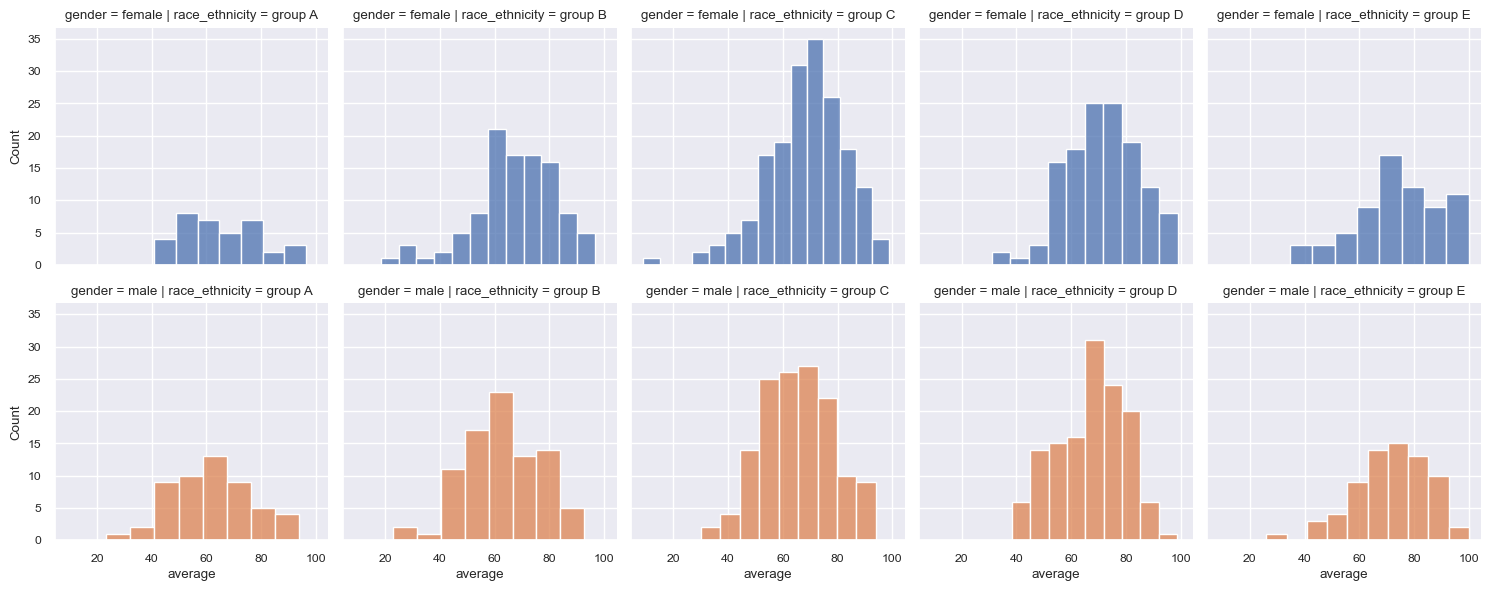

In [56]:
sns.set(font_scale = 0.8)
g = sns.FacetGrid( df_students.sort_values('race_ethnicity'), col ='race_ethnicity', row = 'gender',hue = 'gender')
g.map_dataframe(sns.histplot, x='average')
_grp = df_students.groupby('race_ethnicity')
_grp[['math_score','reading_score', 'writing_score']].agg('min','max','mean')

In [59]:
_grp['average'].agg('min','max')

race_ethnicity
group A    23.333333
group B    18.333333
group C     9.000000
group D    31.000000
group E    26.000000
Name: average, dtype: float64

#### Ethic Groups average for mathmatics

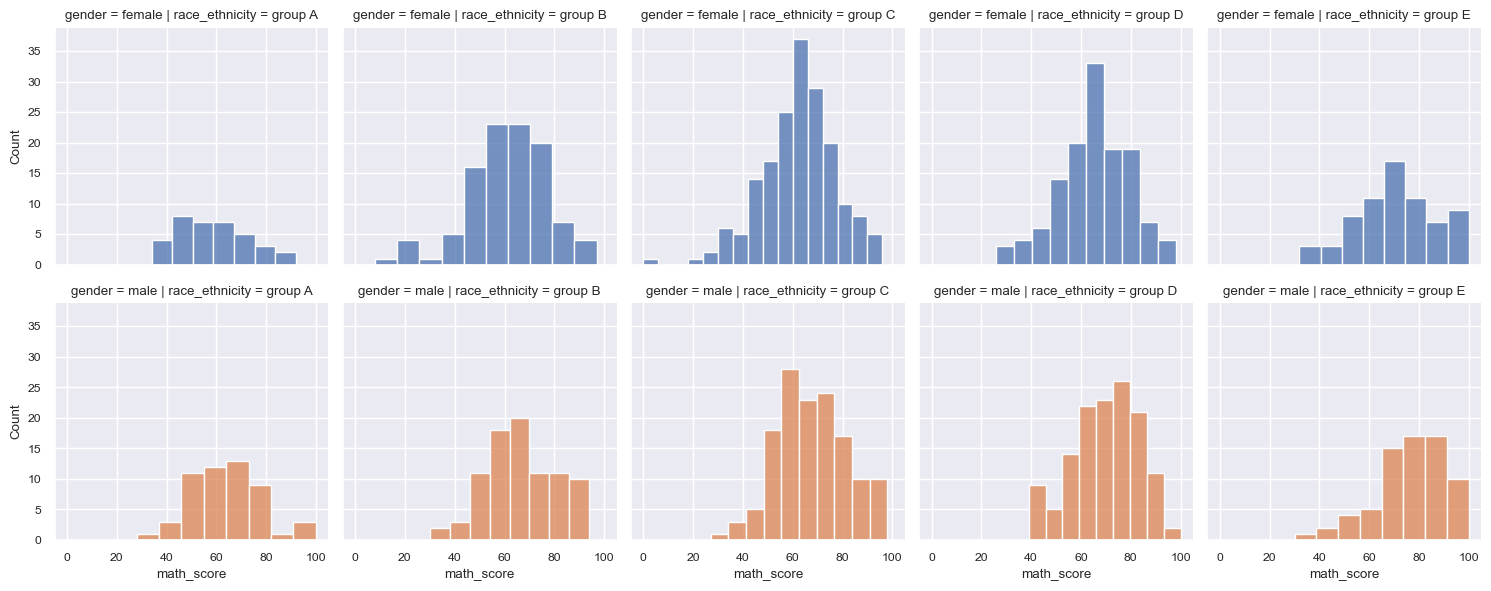

In [60]:
sns.set(font_scale = 0.8)
g = sns.FacetGrid( df_students.sort_values('race_ethnicity'), col ='race_ethnicity', row = 'gender',hue = 'gender')
g.map_dataframe(sns.histplot, x='math_score')

#### Ethic Groups average for Writting

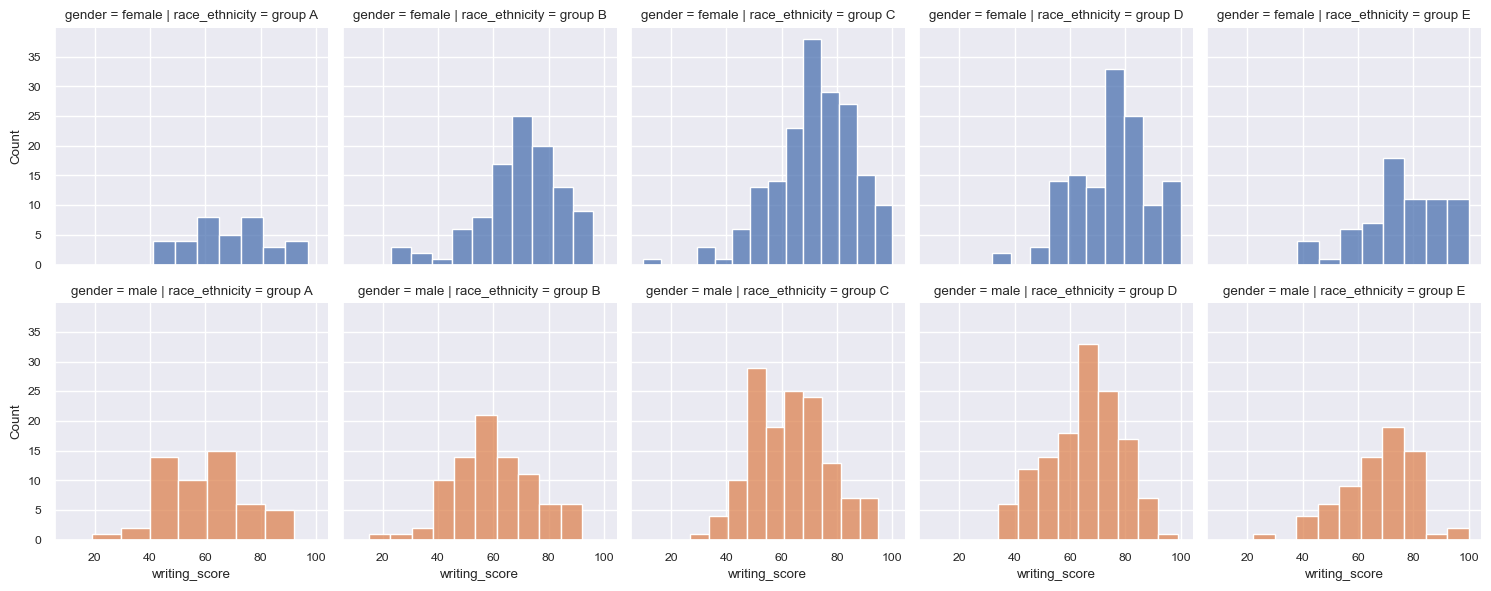

In [61]:
sns.set(font_scale = 0.8)
g = sns.FacetGrid( df_students.sort_values('race_ethnicity'), col ='race_ethnicity', row = 'gender',hue = 'gender')
g.map_dataframe(sns.histplot, x='writing_score')

#### Ethic Groups average for reading

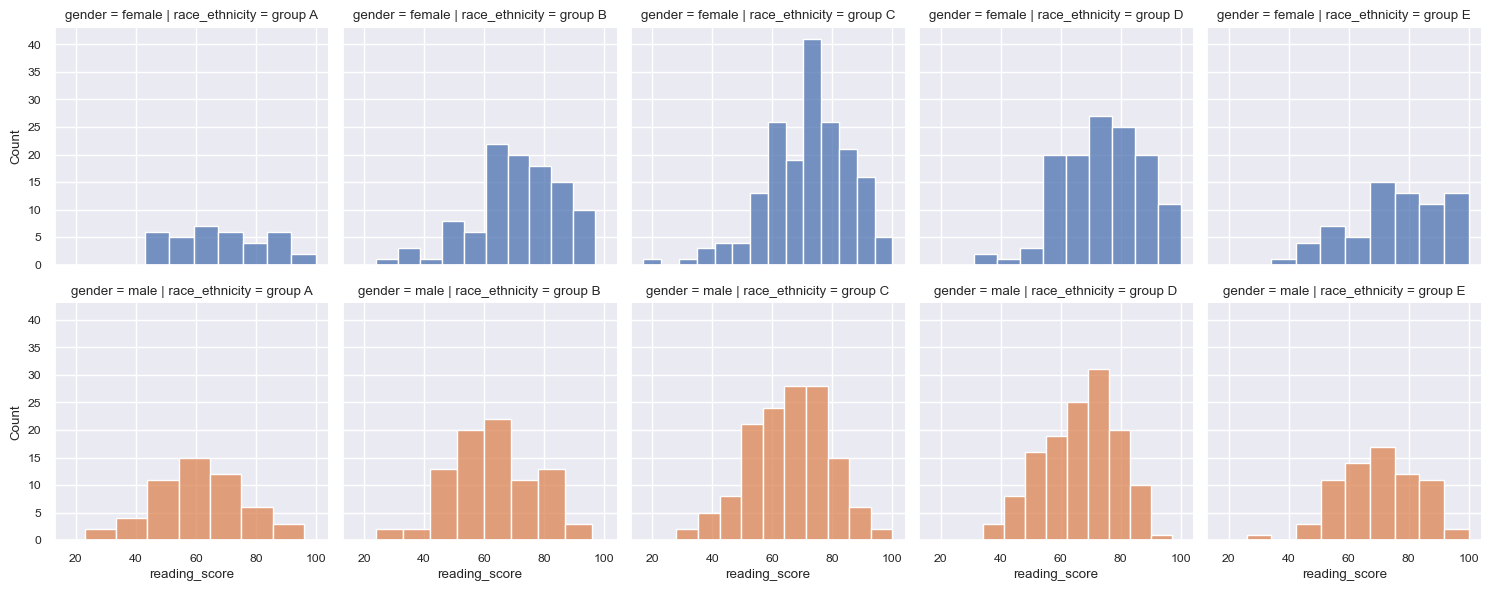

In [64]:
sns.set(font_scale = 0.8)
g = sns.FacetGrid( df_students.sort_values('race_ethnicity'), col ='race_ethnicity', row = 'gender',hue = 'gender')
g.map_dataframe(sns.histplot, x='reading_score')

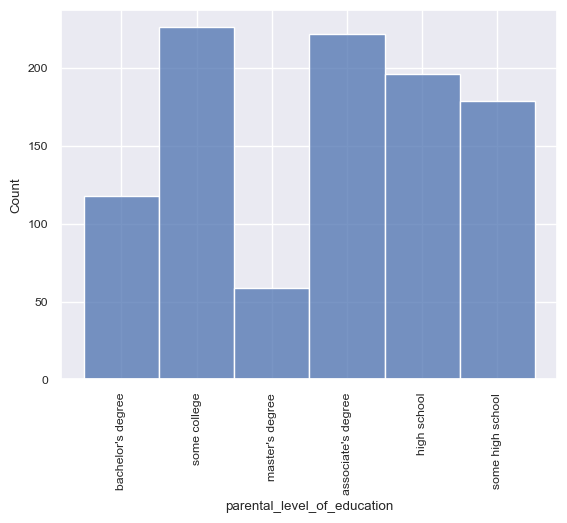

In [69]:
# Parental Qualification
df_students['parental_level_of_education'].value_counts()
sns.histplot(data = df_students, x= 'parental_level_of_education')
plt.xticks(rotation = 90);

In [82]:
df_high_school = df_students.query('parental_level_of_education =="high school"')


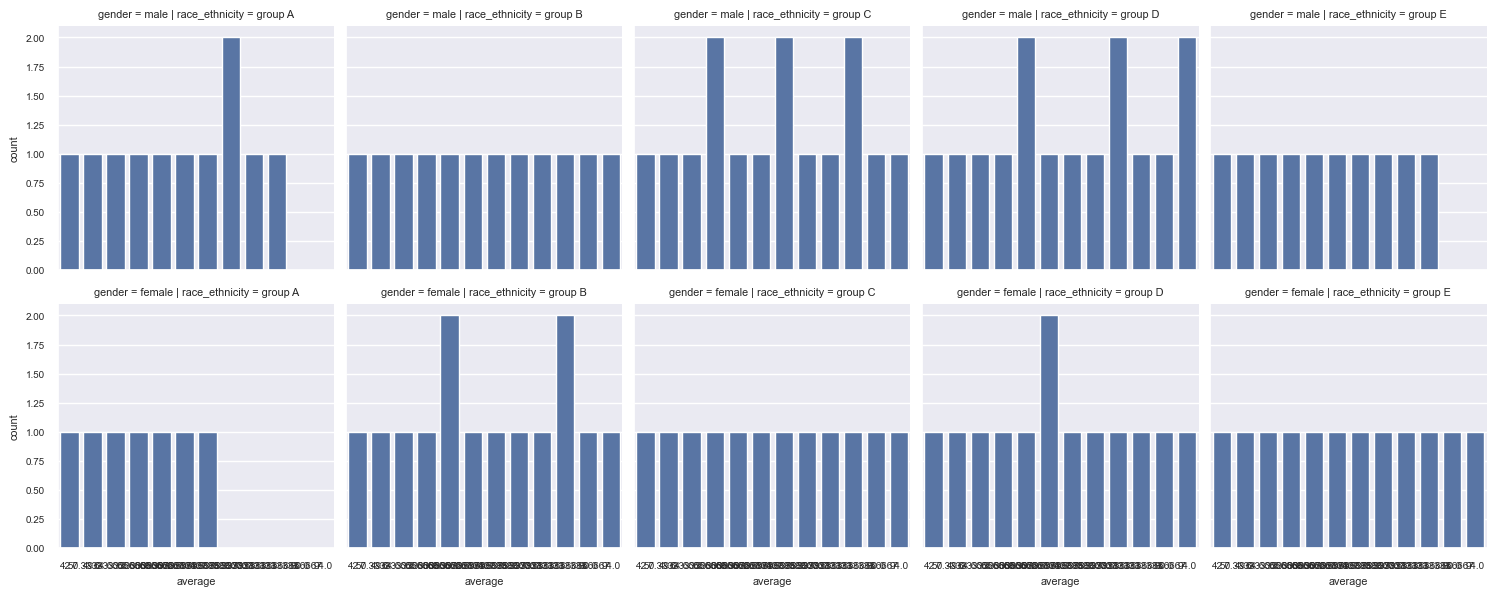

In [94]:
df_students.rename({'parental_level_of_education':'par_ed'}, axis = 1)
sns.set(font_scale = 0.65)
g = sns.FacetGrid( df_high_school.sort_values('race_ethnicity'), col ='race_ethnicity', row = 'gender',hue = 'parental_level_of_education')
g.map_dataframe(sns.countplot, x='average')
# for axes in g.axes.flat:
#   axes.set_xticklabels(
#     axes.get_xticklabels(), rotation = 70)
# plt.tight_layout


<Axes: xlabel='parental_level_of_education', ylabel='average'>

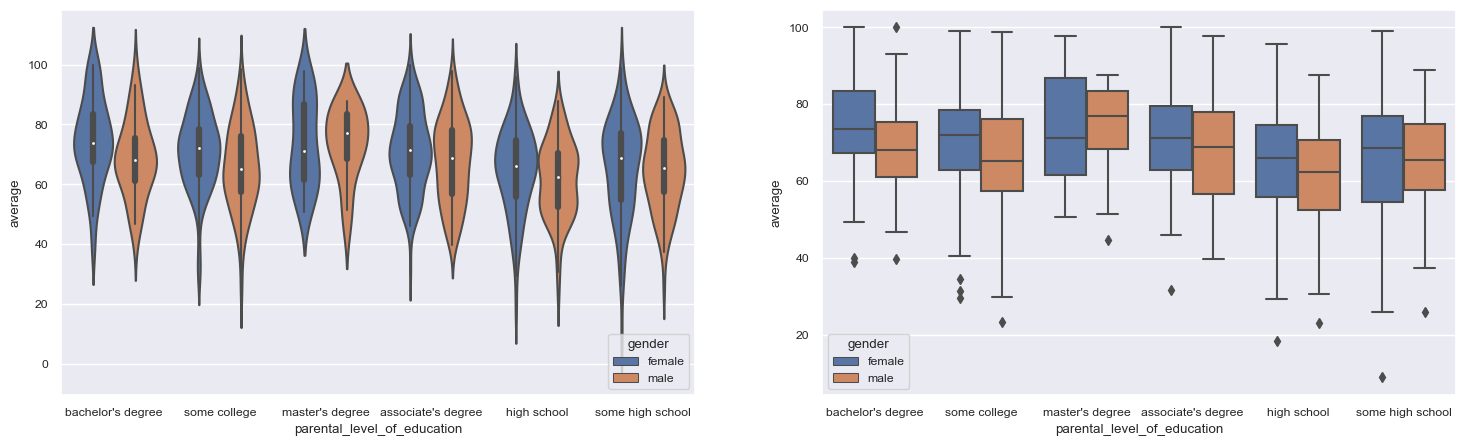

In [104]:
sns.set(font_scale = 0.8)
fig,ax = plt.subplots(nrows=1, ncols=2, figsize =[18,5])
sns.violinplot(data=df_students, x = 'parental_level_of_education', y = 'average', ax = ax[0],hue = 'gender')
sns.boxplot(data=df_students, x = 'parental_level_of_education', y = 'average', ax = ax[1], hue = 'gender')


<Axes: xlabel='race_ethnicity', ylabel='average'>

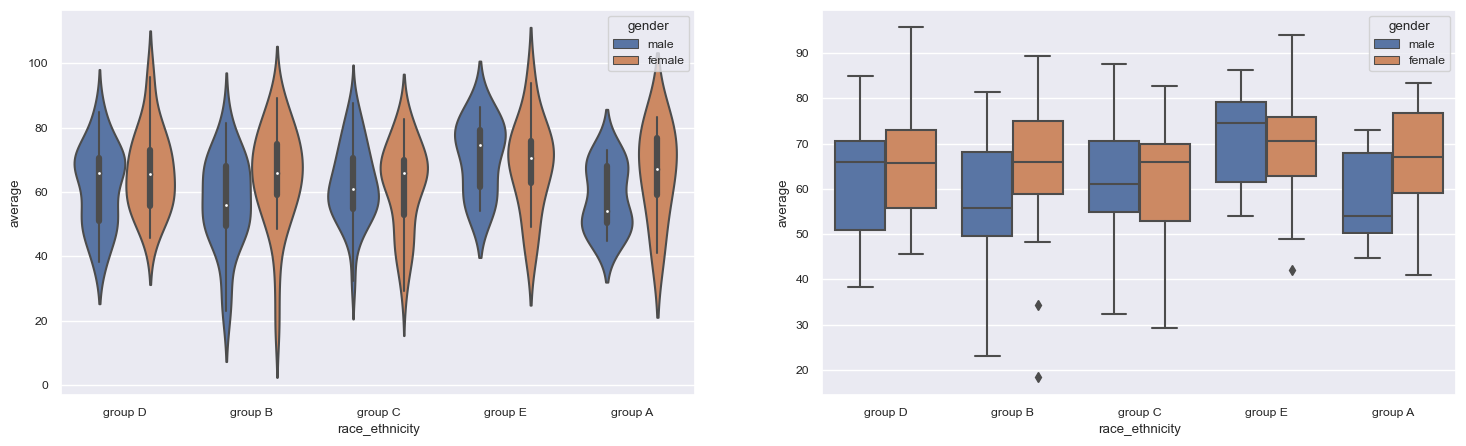

In [106]:
sns.set(font_scale = 0.8)
fig,ax = plt.subplots(nrows=1, ncols=2, figsize =[18,5])
sns.violinplot(data=df_high_school, x = 'race_ethnicity', y = 'average', ax = ax[0],hue = 'gender')
sns.boxplot(data=df_high_school, x = 'race_ethnicity', y = 'average', ax = ax[1], hue = 'gender')


<Axes: xlabel='race_ethnicity', ylabel='average'>

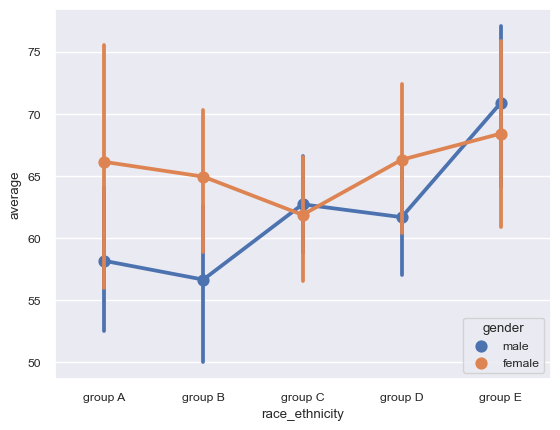

In [113]:
sns.pointplot(data=df_high_school.sort_values('race_ethnicity'), x = 'race_ethnicity', y = 'average', hue = 'gender')


<Axes: xlabel='race_ethnicity', ylabel='average'>

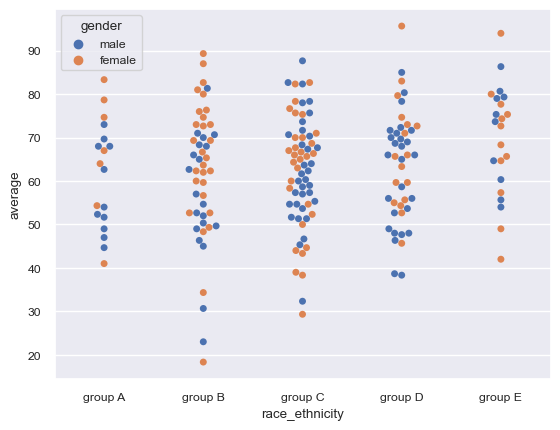

In [119]:
sns.swarmplot(data=df_high_school.sort_values('race_ethnicity'), x = 'race_ethnicity', y = 'average', hue = 'gender')

<Axes: xlabel='race_ethnicity', ylabel='average'>

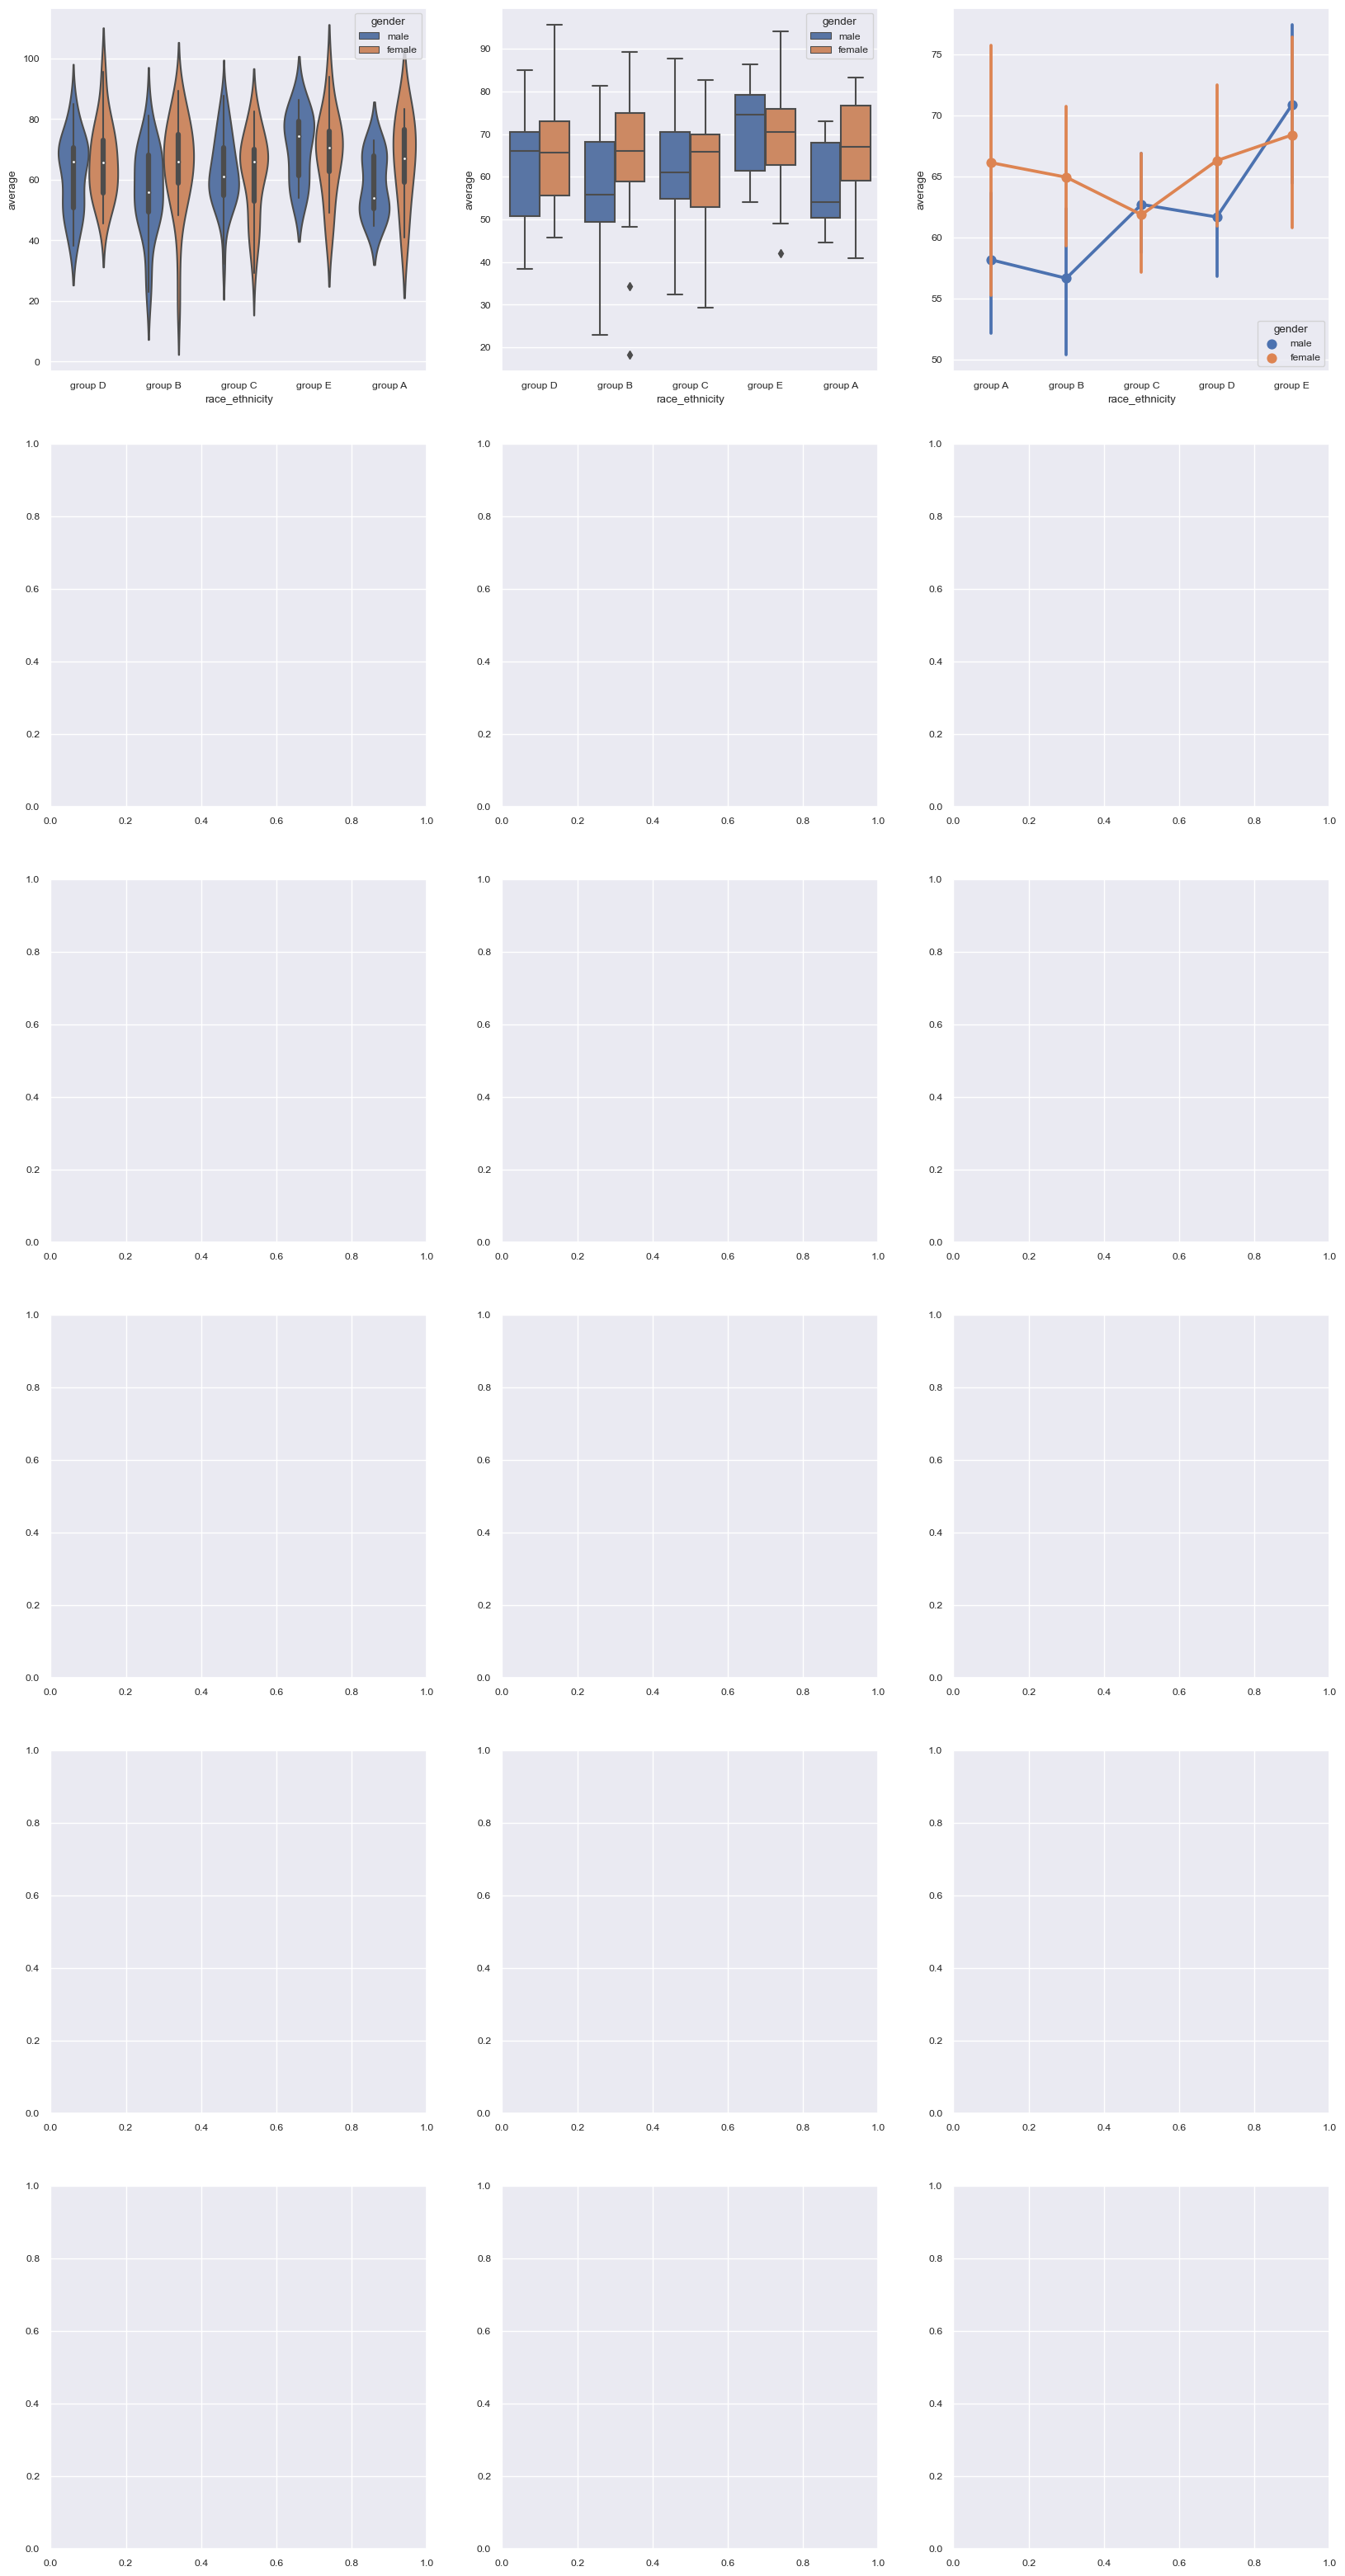

In [126]:
grd_kw= dict(height_ratios = [1,1,1,1,1,1], width_ratios = [1,1,1])
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows= 6, ncols=3, gridspec_kw= grd_kw, figsize = [20,40])
sns.violinplot(data=df_high_school, x = 'race_ethnicity', y = 'average', ax = ax1[0],hue = 'gender')
sns.boxplot(data=df_high_school, x = 'race_ethnicity', y = 'average', ax = ax1[1], hue = 'gender')
sns.pointplot(data=df_high_school.sort_values('race_ethnicity'), x = 'race_ethnicity', y = 'average', hue = 'gender',ax = ax1[2])



<Axes: xlabel='race_ethnicity', ylabel='average'>

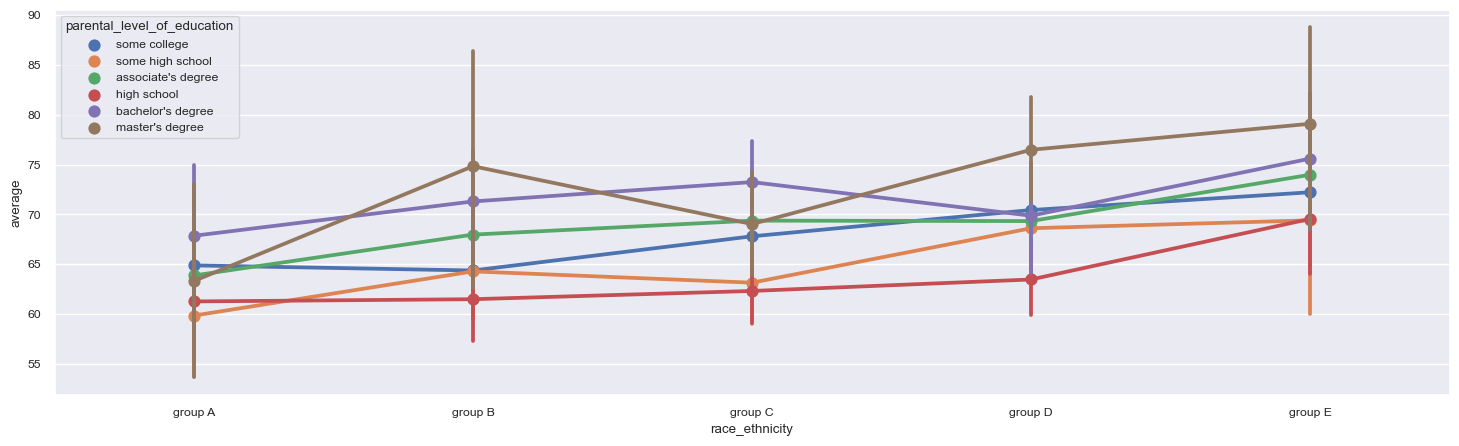

In [129]:
sns.set(font_scale = 0.8)
fig,ax = plt.subplots( figsize =[18,5])
sns.pointplot(data=df_students.sort_values('race_ethnicity'), x = 'race_ethnicity', y = 'average', hue = 'parental_level_of_education',)

<Axes: xlabel='test_preparation_course', ylabel='count'>

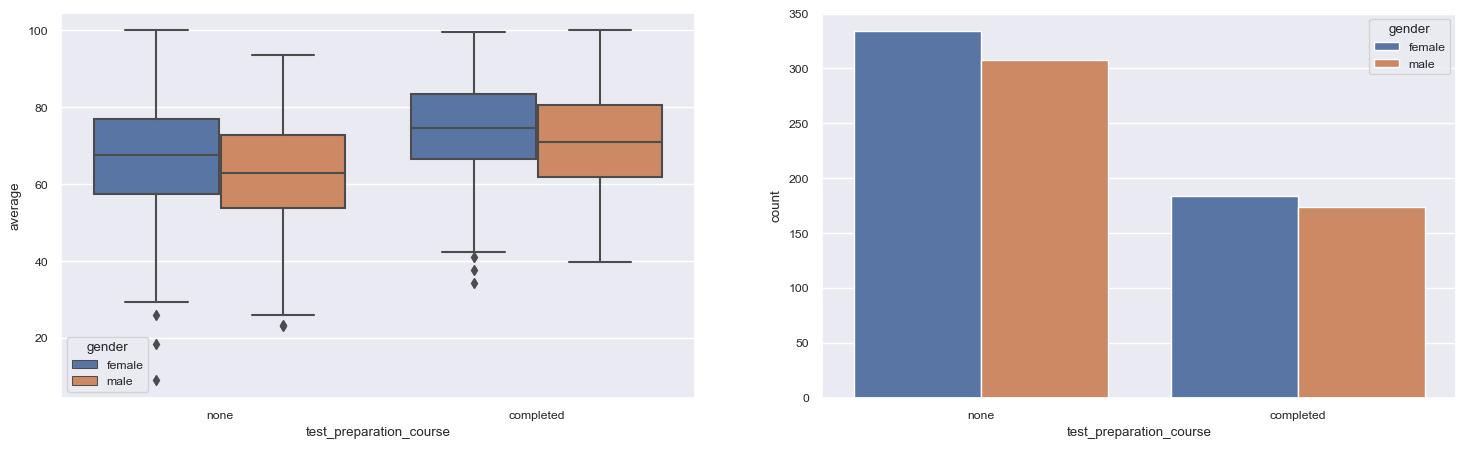

In [136]:
sns.set(font_scale = 0.8)
fig,ax = plt.subplots(nrows=1, ncols=2, figsize =[18,5])
sns.boxplot(df_students, x = 'test_preparation_course', y = 'average', hue = 'gender', ax = ax[0])
sns.countplot(df_students, x = 'test_preparation_course', hue = 'gender', ax= ax[1])


<Axes: xlabel='test_preparation_course', ylabel='count'>

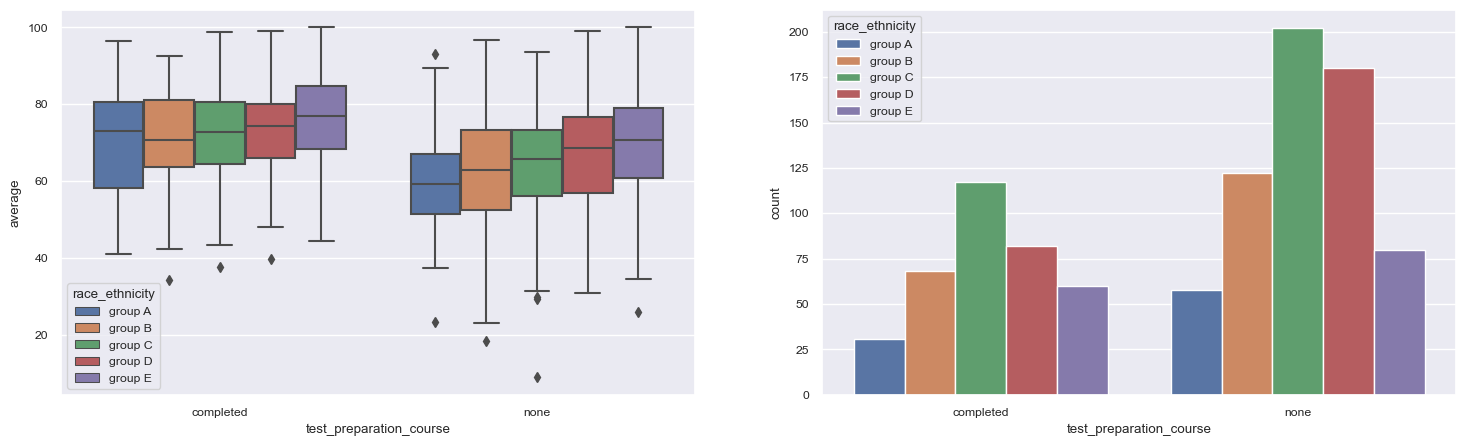

In [139]:
sns.set(font_scale = 0.8)
fig,ax = plt.subplots(nrows=1, ncols=2, figsize =[18,5])
sns.boxplot(df_students.sort_values('race_ethnicity'), x = 'test_preparation_course', y = 'average', hue = 'race_ethnicity', ax = ax[0])
sns.countplot(df_students.sort_values('race_ethnicity'), x = 'test_preparation_course', hue = 'race_ethnicity', ax= ax[1])



<Axes: xlabel='parental_level_of_education', ylabel='average'>

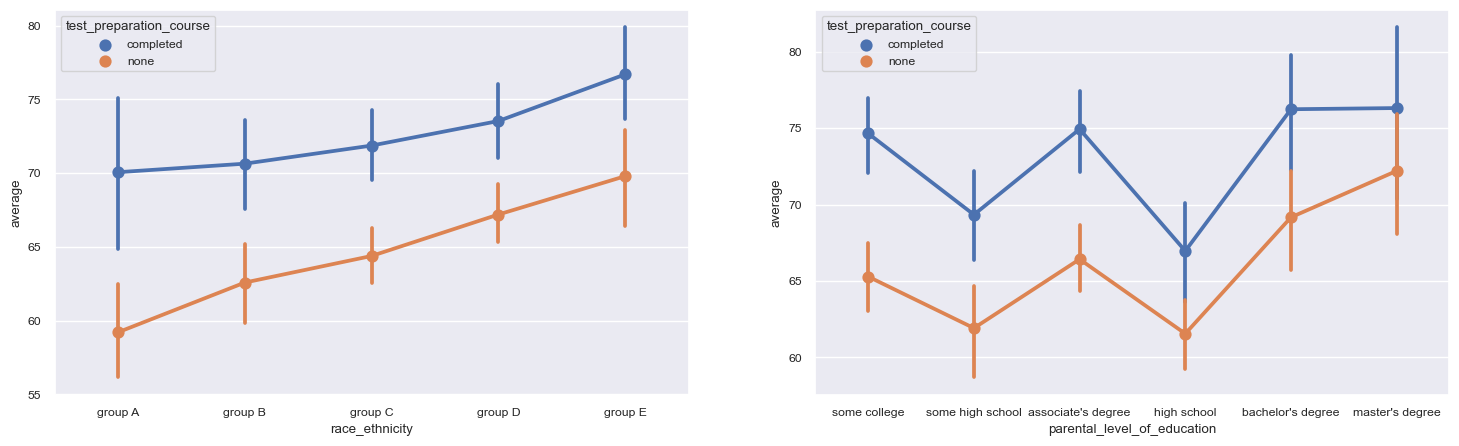

In [145]:
sns.set(font_scale = 0.8)
fig,ax = plt.subplots(nrows=1, ncols=2, figsize =[18,5])
sns.pointplot(df_students.sort_values('race_ethnicity'), x = 'race_ethnicity', y = 'average', hue = 'test_preparation_course', ax= ax[0])

sns.pointplot(df_students.sort_values('race_ethnicity'), x = 'parental_level_of_education', y = 'average', hue = 'test_preparation_course', ax= ax[1])



<Axes: xlabel='test_preparation_course', ylabel='count'>

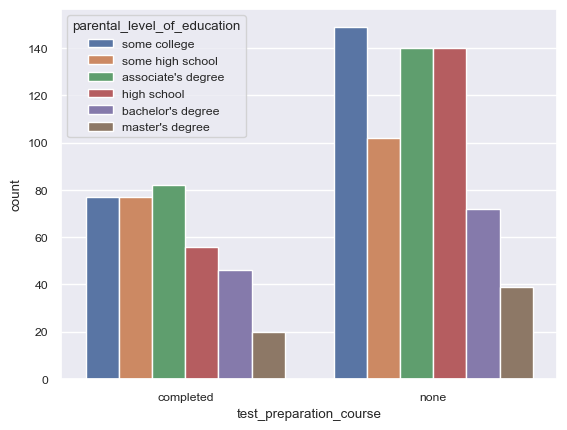

In [144]:
sns.countplot(df_students.sort_values('race_ethnicity'), x = 'test_preparation_course', hue = 'parental_level_of_education')


In [76]:
df_students.rename({'parental_level_of_education':'par_ed'}, axis = 1)

,gender,race_ethnicity,par_ed,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333
